In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [2]:
data=pd.read_csv("/home/anmol007/ml/intern/Geolife_Trajectories_1.3/processed_data2/001.csv")
data.head()
data.drop(["trajectory_id","subfolder","labels","distance","timedelta","velocity","acceleration"],axis=1, inplace=True)
data_min=data.iloc[::12,:]
print data_min.shape[0]
data1=data.to_csv("/home/anmol007/ml/intern/Geolife_Trajectories_1.3/001.csv")

9051


In [3]:
import gmplot
# declare the center of the map, and how much we want the map zoomed in
gmap = gmplot.GoogleMapPlotter(data_min.lat[0], data_min.long[0], 11)
gmap.plot(data_min.lat, data_min.long)
gmap.draw("user001_map.html")

In [4]:
print data_min.head()

    Unnamed: 0        lat        long  altitude             datetime
0            0  39.984094  116.319236       492  2008-10-23 05:53:05
12          12  39.984577  116.319766       309  2008-10-23 05:53:53
24          24  39.984320  116.320808       240  2008-10-23 05:54:38
36          36  39.984007  116.320958       179  2008-10-23 05:55:36
48          48  39.982782  116.321200       157  2008-10-23 05:56:12


In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
coords=data_min.as_matrix(columns=['lat','long'])
kms_rad=6371.088
epsilon=0.1/kms_rad
db= DBSCAN(eps=epsilon, min_samples=10, algorithm="ball_tree",metric="haversine").fit(np.radians(coords))
cluster_labels=db.labels_
num_clusters=len(set(cluster_labels)-set([-1]))
print 'Clustered ' + str(len(data_min)) + ' points to ' + str(num_clusters) + ' clusters'

Clustered 9051 points to 31 clusters


In [11]:


cluster_labels[1000]
data_min["clusters"]=0


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
for i in range(9051):
    data_min["clusters"].iloc[i]=cluster_labels[i]
    print i

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
data_min

,Unnamed: 0,lat,long,altitude,datetime,clusters
0,0,39.984094,116.319236,492,2008-10-23 05:53:05,-1
12,12,39.984577,116.319766,309,2008-10-23 05:53:53,-1
24,24,39.984320,116.320808,240,2008-10-23 05:54:38,-1
36,36,39.984007,116.320958,179,2008-10-23 05:55:36,-1
48,48,39.982782,116.321200,157,2008-10-23 05:56:12,-1
60,60,39.981561,116.321297,96,2008-10-23 05:56:53,-1
72,72,39.980395,116.321411,89,2008-10-23 05:57:28,0
84,84,39.979717,116.321691,102,2008-10-23 05:58:14,0
96,96,39.979570,116.322801,116,2008-10-23 05:59:08,0
108,108,39.979764,116.324395,97,2008-10-23 05:59:45,0


In [33]:
 X = data_min[["clusters"]]

In [37]:
X=X.values
enc = preprocessing.LabelEncoder()

,clusters
0,-1
12,-1
24,-1
36,-1
48,-1
60,-1
72,0
84,0
96,0
108,0


In [45]:
a=X["clusters"].unique().shape[0]

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from hmmlearn import hmm
from sklearn import preprocessing
y=[]
enc = preprocessing.LabelEncoder()
enc.fit(X)
classes = enc.transform(X)
print classes.shape
classes = np.reshape(classes,[len(classes),1])
model = hmm.MultinomialHMM(a)
hidden_states = model.fit(classes)
y_sub, Z= model.sample(100)
#y_sub=np.around(y_sub)
y_sub=enc.inverse_transform(y_sub)
y_sub=y_sub.T



(9051,)


In [51]:
y_sub

array([[-1, -1, -1, -1, -1, -1, -1, 20,  5, -1, -1, 30, -1, 30, -1, -1, 18,
        -1, -1, -1, -1, -1, -1, 18, 30, 11, -1, 11, -1, -1,  8, -1, -1,  5,
        -1, -1, -1, -1, -1, -1, -1, 30, -1, -1, -1, -1, -1, -1, -1, 30, 30,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1,  5, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        30, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 11]])

In [60]:
data_min["clusters"].value_counts()
df_norm = (data_min["clusters"] - data_min["clusters"].mean()) / (data_min["clusters"].max() - data_min["clusters"].min())
df_norm

0        -0.107865
12       -0.107865
24       -0.107865
36       -0.107865
48       -0.107865
60       -0.107865
72       -0.075607
84       -0.075607
96       -0.075607
108      -0.075607
120      -0.075607
132      -0.075607
144      -0.075607
156      -0.075607
168      -0.075607
180      -0.075607
192      -0.075607
204      -0.075607
216      -0.075607
228      -0.075607
240      -0.075607
252      -0.075607
264      -0.075607
276      -0.075607
288      -0.075607
300      -0.075607
312      -0.075607
324      -0.075607
336      -0.075607
348      -0.075607
            ...   
108252   -0.075607
108264   -0.075607
108276   -0.075607
108288   -0.075607
108300   -0.075607
108312   -0.075607
108324   -0.075607
108336   -0.075607
108348   -0.075607
108360   -0.075607
108372   -0.075607
108384   -0.075607
108396   -0.075607
108408   -0.075607
108420   -0.075607
108432   -0.075607
108444   -0.075607
108456   -0.075607
108468   -0.075607
108480   -0.075607
108492   -0.075607
108504   -0.

In [7]:
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print data_min

        Unnamed: 0        lat        long  altitude             datetime
0                0  39.984094  116.319236       492  2008-10-23 05:53:05
12              12  39.984577  116.319766       309  2008-10-23 05:53:53
24              24  39.984320  116.320808       240  2008-10-23 05:54:38
36              36  39.984007  116.320958       179  2008-10-23 05:55:36
48              48  39.982782  116.321200       157  2008-10-23 05:56:12
60              60  39.981561  116.321297        96  2008-10-23 05:56:53
72              72  39.980395  116.321411        89  2008-10-23 05:57:28
84              84  39.979717  116.321691       102  2008-10-23 05:58:14
96              96  39.979570  116.322801       116  2008-10-23 05:59:08
108            108  39.979764  116.324395        97  2008-10-23 05:59:45
120            120  39.979673  116.325961       104  2008-10-23 06:00:22
132            132  39.979127  116.327228       111  2008-10-23 06:00:59
144            144  39.978014  116.327423       119

In [8]:
from shapely.geometry import MultiPoint
from geopy.distance import great_circle
def get_centremost_point(cluster):
    centroid=(MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point=min(cluster,key=lambda point: great_circle(point,centroid).m)
    return tuple(centermost_point)

In [9]:
centermost_points=clusters.map(get_centremost_point)
lats,longs=zip(*centermost_points)
rep_points= pd.DataFrame({"long":longs,"lat":lats})
print rep_points

          lat        long
0   39.999894  116.321636
1   39.992426  116.204859
2   39.997212  116.196669
3   40.002429  116.169433
4   39.997255  116.151973
5   39.993072  116.146137
6   39.989714  116.186608
7   39.988588  116.188416
8   39.991313  116.194788
9   40.031463  116.314022
10  40.050166  116.300990
11  40.069538  116.312949
12  40.069655  116.330564
13  40.075186  116.341531
14  39.975674  116.385594
15  39.977613  116.384092
16  40.000214  116.318252
17  39.966276  116.338832
18  39.951115  116.331635
19  39.988524  116.309795
20  39.966306  116.314723
21  39.966431  116.359467
22  39.966118  116.363455
23  39.960438  116.364136
24  40.071524  116.338583
25  39.991765  116.345671
26  39.987233  116.347667
27  40.008406  116.322257
28  39.908636  116.409577
29  39.961253  116.438450
30  39.978509  116.343646


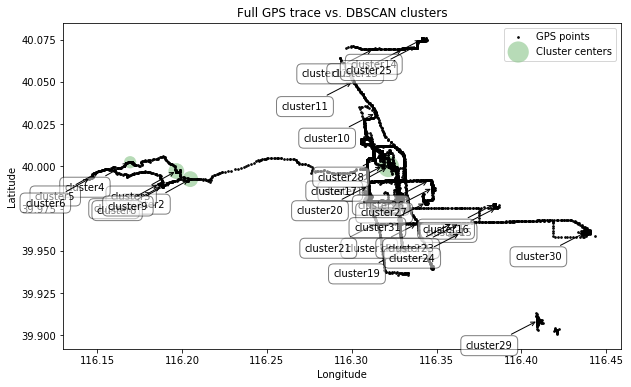

In [10]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rep_points['long'][0], rep_points['lat'][0], c='#99cc99', edgecolor='None', alpha=0.7, s=450)
ax.scatter(rep_points['long'][1], rep_points['lat'][1], c='#99cc99', edgecolor='None', alpha=0.7, s=250)
ax.scatter(rep_points['long'][2], rep_points['lat'][2], c='#99cc99', edgecolor='None', alpha=0.7, s=250)
ax.scatter(rep_points['long'][3], rep_points['lat'][3], c='#99cc99', edgecolor='None', alpha=0.7, s=150)
df_scatter = ax.scatter(data_min['long'], data_min['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full GPS trace vs. DBSCAN clusters')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['GPS points', 'Cluster centers'], loc='upper right')

labels = ['cluster{0}'.format(i) for i in range(1, num_clusters+1)]
for label, x, y in zip(labels, rep_points['long'], rep_points['lat']):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-25, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()